In [211]:
import string
import pickle
from os.path import join
from pymystem3 import Mystem
from string import ascii_letters
from datetime import datetime
import numpy as np
import random
from matplotlib import pyplot as plt

In [97]:
def clean(data, stop_words = None):
    """
    This function takes in input the location of the dataset and does the following data cleaning:
    - exclude reposts
    - remove hashtags
    - remove punctuation
    - do lemmatization

    :param folder: location of the dataset.
    :param filename: name of the dataset.
    :return: None
    """

    # clean data: exclude reposts, remove hashtags and punctuation from text and do lemmatization
    mystem = Mystem()
    # owners = []
    
    data_outs = []
    
    post_texts = [post['text'] for post in data]    
    
    i = 0
    
    for post in data:
        
        i += 1
        
        if not post['text'] in post_texts[i:]:
        
    #         paragraphs = post1['text'].splitlines()

    #         for post in paragraphs:

                # if (post['owner_id'] not in owners) and

    #         if not any(map(lambda c: c in ascii_letters, post['text'])):

            if 'copy_history' not in post:
                words_initial = post['text'].split()
                if not ('#джекичан' in words_initial):
                    words = []
                    for item in words_initial:
                        if not (item.startswith('#') or '@' in item or 'http' in item):

                            extended_punctuation = string.punctuation + '„“«»—–”…‒'
                            no_punctuation = item.translate(str.maketrans('', '', extended_punctuation))
                            words.append(no_punctuation.lower())

    #                     text = remove_pr(mystem, ' '.join(words))
                    text = ' '.join(words)

                    if len(words) > 5:   
    #                     clean_data.append(text)

                        lemmatized_words = mystem.lemmatize(text)
                        
                        data_out = {}
                        data_out['text'] = ''.join(lemmatized_words[:-1])
                        data_out['initial_text'] = post['text']
                        data_out['date_label'] = post['date_label']
                        data_out['owner_id'] = post['owner_id']
                        
                        data_outs.append(data_out)


    return data_outs

In [171]:
with open(join('./clean posts/data/', 'posts_nowar_users_russia.pkl'), 'rb') as file:
    data_nowar = pickle.load(file)

In [212]:
len(data_nowar)

32830

In [213]:
len(data_z)

489600

In [172]:
list_dates = np.zeros([13,2])

list_dates[:,0] = 2022
list_dates[-2:,0] = 2023

for i in range(2,13):
    list_dates[i-2,1] = i
    
for i in range(1,3):
    list_dates[i+10,1] = i

In [173]:
date_labels = ['Февраль 2022', 'Март 2022', 'Апрель 2022', 'Май 2022', 'Июнь 2022', 'Июль 2022', 
               'Август 2022', 'Сентябрь 2022', 'Октябрь 2022', 'Ноябрь 2022', 'Декабрь 2022', 
               'Январь 2023', 'Февраль 2023']

In [174]:
list_dates

array([[2.022e+03, 2.000e+00],
       [2.022e+03, 3.000e+00],
       [2.022e+03, 4.000e+00],
       [2.022e+03, 5.000e+00],
       [2.022e+03, 6.000e+00],
       [2.022e+03, 7.000e+00],
       [2.022e+03, 8.000e+00],
       [2.022e+03, 9.000e+00],
       [2.022e+03, 1.000e+01],
       [2.022e+03, 1.100e+01],
       [2.022e+03, 1.200e+01],
       [2.023e+03, 1.000e+00],
       [2.023e+03, 2.000e+00]])

In [175]:
list_dates[10]

array([2022.,   12.])

In [179]:
def add_dates(data):
    data_dated = []

    for i in range(len(data)):

        dt_object = datetime.fromtimestamp(data[i]['date'])
        where_el = [int(a[0]) == dt_object.year and int(a[1]) == dt_object.month for a in list_dates]
        if len(np.nonzero(where_el)[0])>0:
            ind = np.where(where_el)[0][0]
            date_label = date_labels[ind]
            post_dated = data[i]
            post_dated['date_label'] = date_label
            data_dated.append(post_dated)
            
    return data_dated

In [180]:
data_nowar = add_dates(data_nowar)

In [181]:
data_nowar_clean = clean(data_nowar)

In [182]:
len(data_nowar_clean)

20448

In [183]:
with open(join('./clean posts/data/', 'posts_nowar_users_russia_clean.pkl'), 'wb') as file:
    pickle.dump(data_nowar_clean, file)

In [193]:
with open(join('./clean posts/data/', 'posts_z_users_russia.pkl'), 'rb') as file:
    data_z = pickle.load(file)

In [194]:
data_z = add_dates(data_z)

In [195]:
# random.shuffle(data_z)

In [196]:
# data_z_reduced = data_z[:30000]

In [197]:
data_z_clean = clean(data_z)

In [198]:
len(data_z_clean)

248313

In [199]:
with open(join('./clean posts/data/', 'posts_z_users_russia_clean_full.pkl'), 'wb') as file:
    pickle.dump(data_z_clean, file)

In [200]:
results_z = []
for label in date_labels:
    res = np.sum([(data_z_clean[i]['date_label'] == label) for i in range(len(data_z_clean))])
    results_z.append(res)

In [204]:
results_nowar = []
for label in date_labels:
    res = np.sum([(data_nowar_clean[i]['date_label'] == label) for i in range(len(data_nowar_clean))])
    results_nowar.append(res)

In [210]:
print([i for i in range(13)])
print(np.array(results_z)/sum(results_z))
print(np.array(results_nowar)/sum(results_nowar))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[0.02403418 0.21685937 0.13418548 0.07500211 0.06406028 0.06841768
 0.06752768 0.08322963 0.06726188 0.05551864 0.04851135 0.04086778
 0.05452393]
[0.25088028 0.28076095 0.09062011 0.07384585 0.04499218 0.0366295
 0.03506455 0.06215767 0.04352504 0.02846244 0.01965962 0.01608959
 0.01731221]


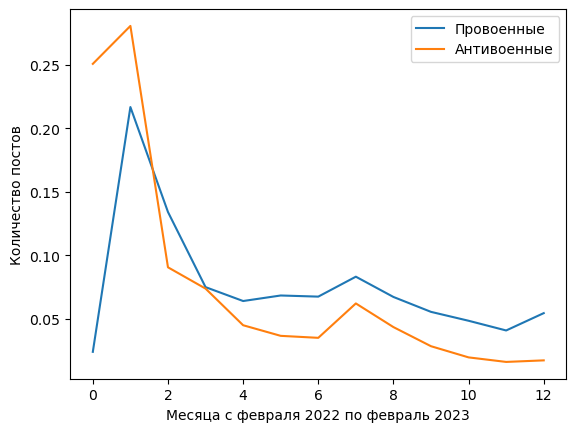

In [209]:
plt.figure()
plt.plot(np.array(results_z)/sum(results_z))
plt.plot(np.array(results_nowar)/sum(results_nowar))
plt.xlabel('Месяца с февраля 2022 по февраль 2023')
plt.ylabel('Количество постов')
plt.legend(['Провоенные','Антивоенные'])

In [191]:
len(data_nowar_clean)

20448

In [192]:
len(data_z_clean)

21026